In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('datasets/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


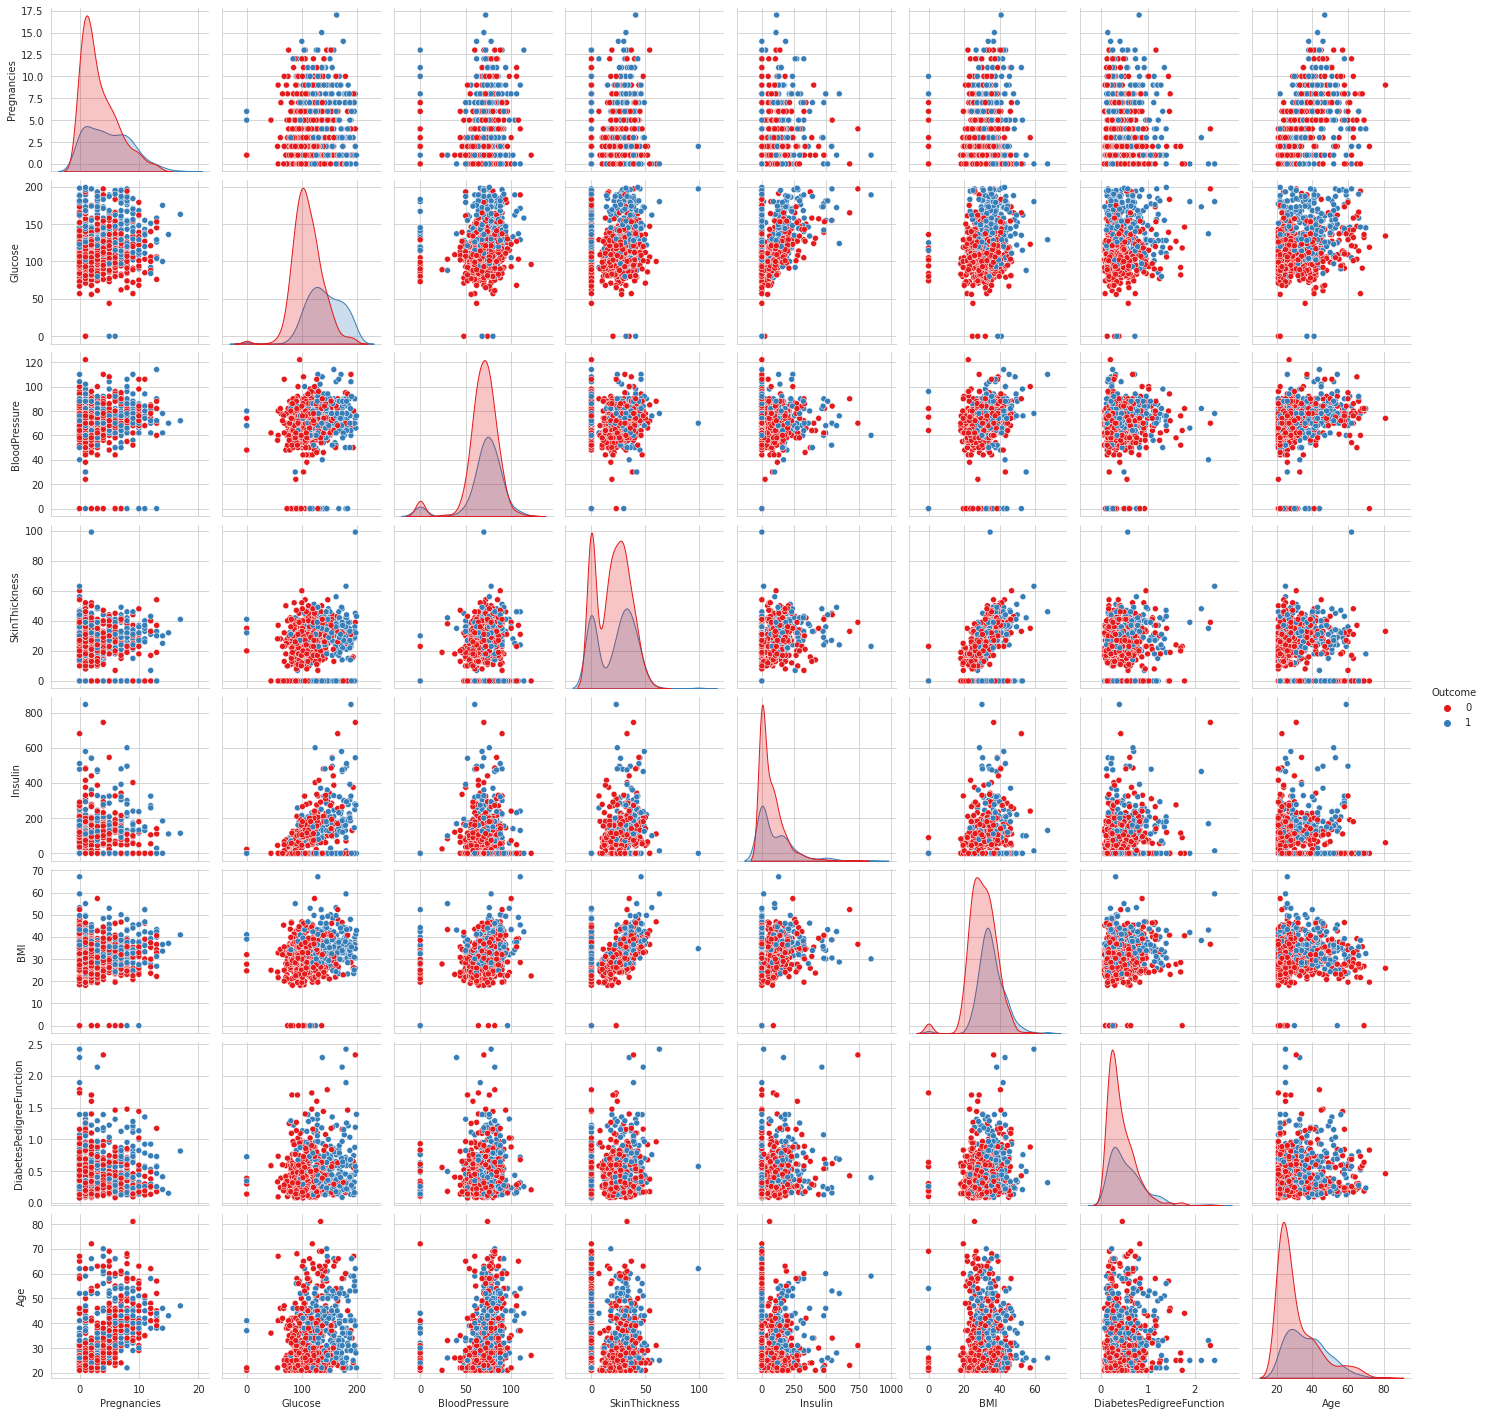

In [11]:
sns.pairplot(data, hue='Outcome',palette='Set1')

In [13]:
data.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [15]:
#rename long column name
data.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

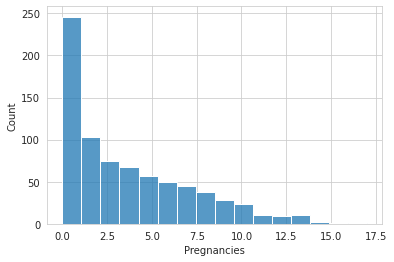

In [18]:
sns.histplot(data['Pregnancies'])

In [20]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

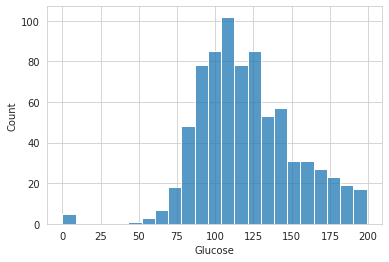

In [19]:
sns.histplot(data['Glucose'])

In [22]:
df = data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# replacing zero with NaN value
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.NaN)

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
# replaceing nan value with mean or median
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [32]:
# model building
from sklearn.model_selection import train_test_split

In [33]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
# using random forest classifier to create model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [38]:
# training
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [39]:
# prediction
y_pred = rfc.predict(x_test)

In [40]:
# model accuracy check
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(round(accuracy_score(y_test, y_pred),2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       150
           1       0.68      0.64      0.66        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



[[126  24]
 [ 29  52]]


0.77
